# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anubhavgoyal10/laptop-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/laptop-prices-dataset


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [14]:
df = pd.read_csv('/kaggle/input/laptop-prices-dataset/laptopPrice.csv', encoding='latin1')

In [15]:
# Menampilkan beberapa baris pertama dataset
print("Beberapa baris pertama dataset:")
display(df.head())

Beberapa baris pertama dataset:


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [16]:
# Menampilkan informasi umum dataset (tipe data, missing values)
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 n

In [17]:
df.isnull().sum()

,0
brand,0
processor_brand,0
processor_name,0
processor_gnrtn,0
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0
os_bit,0


In [18]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif dataset:")
display(df.describe())


Statistik deskriptif dataset:


,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
# Mengidentifikasi kolom numerik yang akan diperiksa outlier
numerical_columns_for_outliers = ['Price', 'Number of Ratings', 'Number of Reviews']

# Menghapus baris yang memiliki nilai outlier (nilai z-score > 3) pada kolom numerik yang ditentukan
df_cleaned = df[(np.abs(stats.zscore(df[numerical_columns_for_outliers])) < 3).all(axis=1)].copy() # Buat salinan untuk menghindari SettingWithCopyWarning

print(f"\nDataset sebelum menangani outlier: {df.shape[0]} baris.")
print(f"Setelah menangani outlier, dataset terdapat {df_cleaned.shape[0]} baris.")

# Gunakan df_cleaned untuk analisis selanjutnya
df = df_cleaned



Dataset sebelum menangani outlier: 823 baris.
Setelah menangani outlier, dataset terdapat 785 baris.



Correlation Matrix (Numerical Features):


,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.205643,-0.199638
Number of Ratings,-0.205643,1.000000,0.982467
Number of Reviews,-0.199638,0.982467,1.000000


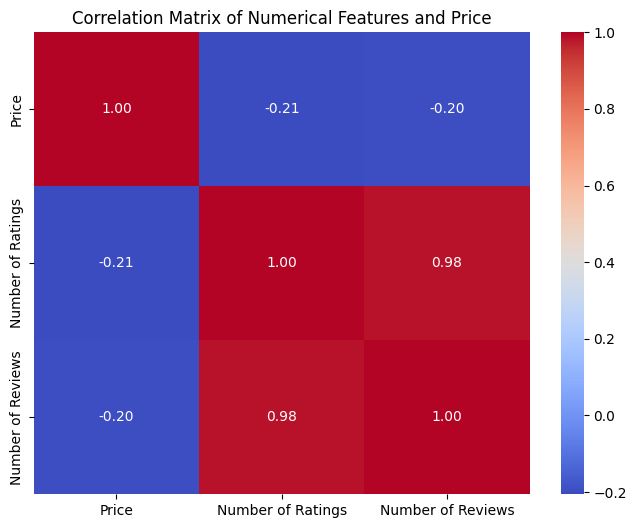

In [20]:
df_numeric_for_corr = df[['Price', 'Number of Ratings', 'Number of Reviews']] # Gunakan df setelah outlier handling

# Hitung matriks korelasi
correlation_matrix = df_numeric_for_corr.corr()

print("\nCorrelation Matrix (Numerical Features):")
display(correlation_matrix)

# Visualisasi Correlation Matrix (opsional)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()

In [21]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif dataset:")
display(df.describe())


Statistik deskriptif dataset:


,Price,Number of Ratings,Number of Reviews
count,785.000000,785.000000,785.000000
mean,72820.068790,187.815287,23.303185
std,34756.882515,429.448154,52.938136
min,16990.000000,0.000000,0.000000
25%,46200.000000,0.000000,0.000000
50%,63990.000000,17.000000,2.000000
75%,86990.000000,126.000000,17.000000
max,211753.000000,3062.000000,375.000000


In [22]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

print("\nCleaned dataset (after outlier handling) exported to CSV file:")
print("- df_cleaned.csv")


Cleaned dataset (after outlier handling) exported to CSV file:
- df_cleaned.csv


In [23]:
# Gunakan df_cleaned untuk analisis selanjutnya
df = df_cleaned

In [24]:
# Mengidentifikasi kolom kategorikal (tipe 'object')
categorical_variables = df.columns[df.dtypes == 'object']

# Melakukan One-Hot Encoding pada variabel kategorikal
# 'drop_first=True' untuk menghindari perangkap multikolinieritas
df_processed = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

print("Dataset setelah One-Hot Encoding:")
display(df_processed.head())

print(f"\nDataset setelah encoding, dataset memiliki {df_processed.shape[1]} kolom.")


Dataset setelah One-Hot Encoding:


,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,69990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,26990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False



Dataset setelah encoding, dataset memiliki 63 kolom.


In [25]:
# Memisahkan fitur (X) dan target (y)
X = df_processed.drop("Price", axis=1) # Gunakan drop dengan axis=1 untuk menghapus kolom
y = df_processed['Price']

In [26]:
# Membagi data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f"\nUkuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")



Ukuran X_train: (549, 62)
Ukuran X_test: (236, 62)
Ukuran y_train: (549,)
Ukuran y_test: (236,)


In [27]:

numerical_features_after_encoding = ['Number of Ratings', 'Number of Reviews']
# Pastikan kolom-kolom ini ada di X_train
numerical_features_after_encoding = [col for col in numerical_features_after_encoding if col in X_train.columns]

In [28]:
# Menginisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan fit scaler hanya pada data training untuk mempelajari parameter scaling (mean dan std dev)
scaler.fit(X_train[numerical_features_after_encoding])

# Melakukan transform (penskalaan) pada data training dan data testing
X_train[numerical_features_after_encoding] = X_train[numerical_features_after_encoding].astype(np.float64)
X_test[numerical_features_after_encoding] = X_test[numerical_features_after_encoding].astype(np.float64)


# Melakukan transform (penskalaan) pada data training dan data testing
X_train.loc[:, numerical_features_after_encoding] = scaler.transform(X_train[numerical_features_after_encoding])
X_test.loc[:, numerical_features_after_encoding] = scaler.transform(X_test[numerical_features_after_encoding])

print("\nContoh X_train setelah scaling pada kolom numerik:")
display(X_train[numerical_features_after_encoding].head())
print("\nContoh X_test setelah scaling pada kolom numerik:")
display(X_test[numerical_features_after_encoding].head())



Contoh X_train setelah scaling pada kolom numerik:


,Number of Ratings,Number of Reviews
59,-0.442949,-0.448492
798,-0.422266,-0.410777
16,-0.442949,-0.448492
501,-0.442949,-0.448492
82,-0.442949,-0.448492



Contoh X_test setelah scaling pada kolom numerik:


,Number of Ratings,Number of Reviews
782,-0.403881,-0.410777
141,-0.408477,-0.429634
43,1.299016,0.758386
102,-0.442949,-0.448492
561,-0.442949,-0.448492


In [29]:
# Export preprocessed data to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\nPreprocessed data exported to CSV files:")
print("- X_train.csv")
print("- y_train.csv")
print("- X_test.csv")
print("- y_test.csv")


Preprocessed data exported to CSV files:
- X_train.csv
- y_train.csv
- X_test.csv
- y_test.csv
